<a href="https://colab.research.google.com/github/muhammad-mobeen/CNN-on-Fashion-MNIST-Dataset/blob/main/MLAssignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [14]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/datasets/zalando-research/fashionmnist') # insert ypu kaggle  username and key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mobeen360
Your Kaggle Key: ··········


100%|██████████| 68.8M/68.8M [00:04<00:00, 16.3MB/s]


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
# from tensorflow.keras.datasets import fashion_mnist
# from keras.utils.vis_utils import model_to_dot
# from keras.utils import np_utils
from keras.utils import plot_model, to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Dataset

In [16]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


## Hyper Parameters

In [27]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
# Model Hyper-Parameters
NO_EPOCHS = 15
BATCH_SIZE = 32

# Flatening, Scaling & Spliting the Dataset Train:Test

In [18]:
# data preprocessing
def data_preprocessing(raw):
    # out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]

    # Converting to float32 dtype
    x_as_array = np.float32(raw.values[:,1:])

    # Reshaping to (28,28,1)
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)

    # Scaling the dataset
    out_x = x_shaped_array / 255

    return out_x, out_y

# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [19]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


# Structure of Neural Network

Build the model
We will use a Sequential model.

The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage. The layers added are as follows:

Conv2D is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:

filters - the number of filters (Kernels) used with this layer; here filters = 32;
kernel_size - the dimmension of the Kernel: (3 x 3);
activation - is the activation function used, in this case relu;
kernel_initializer - the function used for initializing the kernel;
input_shape - is the shape of the image presented to the CNN: in our case is 28 x 28 The input and output of the Conv2D is a 4D tensor.
MaxPooling2D is a Max pooling operation for spatial data. Parameters used here are:

pool_size, in this case (2,2), representing the factors by which to downscale in both directions;

Conv2D with the following parameters:

filters: 64;
kernel_size : (3 x 3);
activation : relu;
MaxPooling2D with parameter:

pool_size : (2,2);
Conv2D with the following parameters:

filters: 128;
kernel_size : (3 x 3);
activation : relu;
Flatten. This layer Flattens the input. Does not affect the batch size. It is used without parameters;

Dense. This layer is a regular fully-connected NN layer. It is used without parameters;

units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
activation - activation function : relu;
Dense. This is the final layer (fully connected). It is used with the parameters:

units: the number of classes (in our case 10);
activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)
Then we compile the model, specifying as well the following parameters:

loss;
optimizer;
metrics.

In [28]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer='adam',
#               metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy,
            #   optimizer='adam',
              optimizer=optimizers.Adam(clipnorm=1),
              metrics=['accuracy'])

# Model Summary

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

# Training Model

In [30]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/15
1500/1500 [==============================] - 46s 5ms/step - loss: 0.4543 - accuracy: 0.8343 - val_loss: 0.3339 - val_accuracy: 0.8788
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2945 - accuracy: 0.8916 - val_loss: 0.2878 - val_accuracy: 0.8939
Epoch 3/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2474 - accuracy: 0.9082 - val_loss: 0.2635 - val_accuracy: 0.9056
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2114 - accuracy: 0.9216 - val_loss: 0.2706 - val_accuracy: 0.9043
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1821 - accuracy: 0.9322 - val_loss: 0.2685 - val_accuracy: 0.9062
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1607 - accuracy: 0.9387 - val_loss: 0.2884 - val_accuracy: 0.9089
Epoch 7/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1382 - accuracy: 0.9479 - val_loss: 0.2752 - val_accuracy

# Model Evaluation

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4326792359352112
Test accuracy: 0.9120000004768372


Test accuracy is around 0.9

We evaluated the model accuracy based on the predicted values for the test set. Let's check the validation value during training.

# Validation accuracy and loss

In [32]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))

    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")

    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])


    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Visualize classified images

In [127]:
#get the predictions for the test data
predicted_classes = model.predict(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

313/313 [==============================] - 1s 2ms/step


In [116]:
predicted_classes = model.predict(X_test)
y_pred_valid = np.where(predicted_classes > 0.5, 1, 0)

313/313 [==============================] - 1s 2ms/step


In [167]:
dudu = np.nonzero(predicted_classes)

In [150]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y_pred_valid)[0]
incorrect = np.nonzero(p!=y_pred_valid)[0]

In [151]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 6873
Incorrect predicted classes: 93127


## Correctly classified images

In [125]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

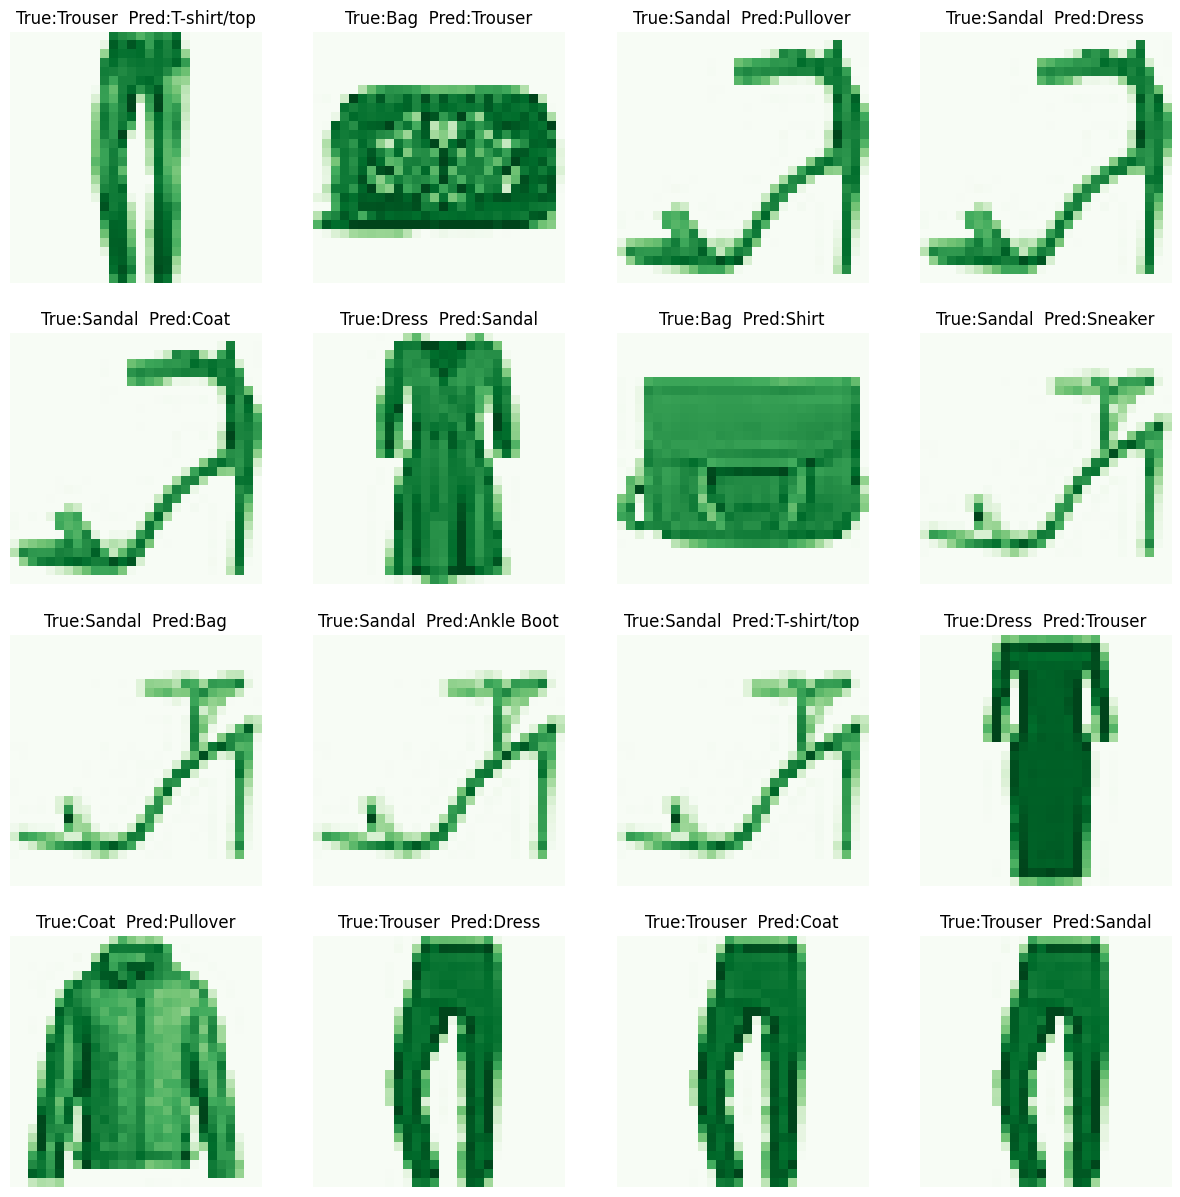

In [172]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[i%10]))
        # ax[i//4, i%4].set_title("True:{}  Pred:".format(labels[y_true[indx]]))
    plt.show()

plot_images(correct, "Greens")

## Incorrectly classified images

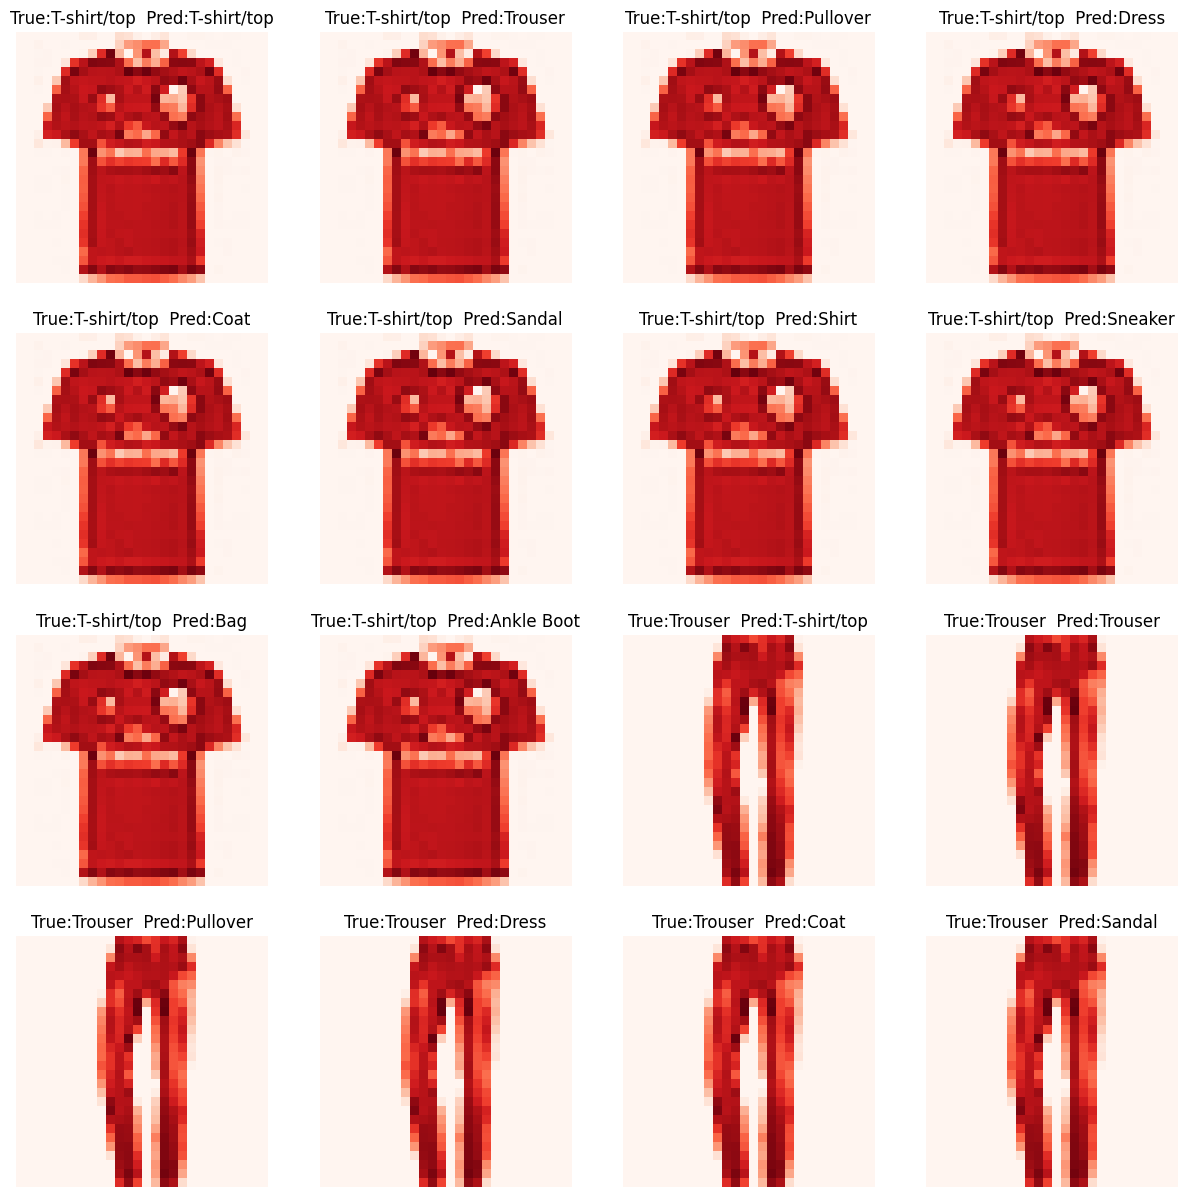

In [173]:
plot_images(incorrect, "Reds")

# Conclusion:

With a complex sequential model with multiple convolution layers and 15 epochs for the training, we obtained an accuracy ~0.1 for test prediction. After investigating the validation accuracy and loss, we understood that the model is overfitting.
We retrained the model with Dropout layers to the model to reduce overfitting.
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.93 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover).